# PART- 1 `( Data Scraping )`

# Data Scraping from Otomoto Website
*This website is the largest online advertising and shopping site for buying and selling second-hand cars in Poland.*

### The structure of links in Otomoto like:
- **Website link:** https://www.otomoto.pl/
- **Defining types of car:** https://www.otomoto.pl/osobowe/ <br> *osobowe means type of car. It refers to regular passenger car.*
- **Choosing brand of car:** https://www.otomoto.pl/osobowe/"car-brand" <br> Example: https://www.otomoto.pl/osobowe/Audi

### Navigating between pages:
- When we click on the second page of the list, the page information is included in the url. URL structure of the links to the following pages:
    - **Second Page:** https://www.otomoto.pl/osobowe/audi?page=2
    - **Third Page:** https://www.otomoto.pl/osobowe/audi?page=3
    - ...

### Challenging Part 1 -> List View
**How to collect information about car features from list view?**

<img src="https://raw.githubusercontent.com/emir1031/03_PROJECTS/main/09_Data_Scraping/pics/a.png" width="600">

#### Challenging Part 1.1 -> How Many Page
*How do we know how many pages there are in total on the website to be scraped?*

<img src="https://raw.githubusercontent.com/emir1031/03_PROJECTS/main/09_Data_Scraping/pics/b.png" width="600">

- *Currently, we manually control and define the number of pages, but in the future we can implement setting it as the maximum number of pages.*

### Challenging Part 2 -> Detail View
**How to collect information about car features from details view (It opens when click to ad.)?**

<img src="https://raw.githubusercontent.com/emir1031/03_PROJECTS/main/09_Data_Scraping/pics/c.png" width="600">

### We will be using Selenium library together with Python libraries
- Because website content is dynamic.

### Annex Pic-1:

**User-Agent header for browser emulation.**

<img src="https://raw.githubusercontent.com/emir1031/03_PROJECTS/main/09_Data_Scraping/pics/d.png" width="600">

___

# PART- 2 `( Data Cleaning )`

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('cars.csv')
df.shape

(1620, 44)

In [2]:
# Let's check the all columns and their names. First looking at the dataset if it imported correct etc. ...
df.head(3).T

,0,1,2
link,https://www.otomoto.pl/osobowe/oferta/audi-a4-...,https://www.otomoto.pl/osobowe/oferta/audi-q8-...,https://www.otomoto.pl/osobowe/oferta/audi-a4-...
full_name,Audi A4 Avant 2.0 TDI DPF Ambition,Audi Q8 55 TFSI quattro tiptronic,Audi A4 2.0 TDI Quattro S tronic
description,1 968 cm3 • 143 KM • Auto sprowadzone z Niemie...,"2 995 cm3 • 340 KM • Audi Q8 55 I-HEV,3.0 Benz...",1 968 cm3 • 190 KM • Audi A4 Allroad 2.0 TDI Q...
year,2013,2019,2016
mileage_km,188 000 km,65 000 km,200 400 km
fuel_type,Diesel,Benzyna,Diesel
price_pln,42 900,119 900,81 000
offer_from,Prywatne,Prywatne,Prywatne
show_vin_offers,Tak,Tak,Tak
has_registration_number,Tak,Tak,Tak


In [3]:
# to check dataset's general info --> dtypes of the columns, how many rows and columns and NaN values etc. ...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   link                           1620 non-null   object 
 1   full_name                      1620 non-null   object 
 2   description                    1620 non-null   object 
 3   year                           1620 non-null   int64  
 4   mileage_km                     1617 non-null   object 
 5   fuel_type                      1620 non-null   object 
 6   price_pln                      1620 non-null   object 
 7   offer_from                     1594 non-null   object 
 8   show_vin_offers                1549 non-null   object 
 9   has_registration_number        1134 non-null   object 
 10  brand                          1594 non-null   object 
 11  model                          1594 non-null   object 
 12  version                        1329 non-null   o

# Let's drop unnecessary and duplicate columns:
### Duplicate Columns:
- year (1620 non-null) = production_year (1594 non-null)
- mileage_km (1617 non-null) = mileage (1591 non-null)
- fuel_type (1620 non-null) = fuel_type_detail (1594 non-null)
### Unnecessary Columns:
- full_name
- description
- offer_from
- show_vin_offers
- has_registration_number
- manufacturers_warranty_period
- or_warranty_up_to_km
- first_registration_date
- registration_number
- registered_in_poland
- first_owner
- serviced_at_dealership

In [4]:
# Lets drop and check again.
drop_columns = ["production_year", 
                "mileage", 
                "fuel_type_detail", 
                "full_name", 
                "description", 
                "offer_from", 
                "show_vin_offers", 
                "has_registration_number",
                "manufacturers_warranty_period", 
                "or_warranty_up_to_km", 
                "first_registration_date", 
                "registration_number", 
                "registered_in_poland", 
                "first_owner", 
                "serviced_at_dealership"]
df.drop(drop_columns, axis = 1, inplace = True)
df.head().T

,0,1,2,3,4
link,https://www.otomoto.pl/osobowe/oferta/audi-a4-...,https://www.otomoto.pl/osobowe/oferta/audi-q8-...,https://www.otomoto.pl/osobowe/oferta/audi-a4-...,https://otomotoklik.pl/oferta/WAUZZZ8V8KA01903...,https://www.otomoto.pl/osobowe/oferta/audi-q5-...
year,2013,2019,2016,2018,2024
mileage_km,188 000 km,65 000 km,200 400 km,144 129 km,1 km
fuel_type,Diesel,Benzyna,Diesel,Petrol,Diesel
price_pln,42 900,119 900,81 000,85 300,266 400
brand,Audi,Audi,Audi,NaN,Audi
model,A4,Q8,A4,NaN,Q5 Sportback
version,Avant 2.0 TDI DPF Ambition,55 TFSI quattro tiptronic,2.0 TDI Quattro S tronic,NaN,40 TDI mHEV Quattro S Line S tronic
generation,B8 (2007-2015),NaN,B9 (2015-),NaN,NaN
engine_capacity_detail,1 968 cm3,2 995 cm3,1 968 cm3,NaN,1 968 cm3


# Fixing wrong column order:
We need to swap damaged and body_type column names. There is an error in our Python function.

In [5]:
# Lets swap and check again.
df[['damaged','body_type']]=df[['body_type','damaged']]
df.head(5).T 

,0,1,2,3,4
link,https://www.otomoto.pl/osobowe/oferta/audi-a4-...,https://www.otomoto.pl/osobowe/oferta/audi-q8-...,https://www.otomoto.pl/osobowe/oferta/audi-a4-...,https://otomotoklik.pl/oferta/WAUZZZ8V8KA01903...,https://www.otomoto.pl/osobowe/oferta/audi-q5-...
year,2013,2019,2016,2018,2024
mileage_km,188 000 km,65 000 km,200 400 km,144 129 km,1 km
fuel_type,Diesel,Benzyna,Diesel,Petrol,Diesel
price_pln,42 900,119 900,81 000,85 300,266 400
brand,Audi,Audi,Audi,NaN,Audi
model,A4,Q8,A4,NaN,Q5 Sportback
version,Avant 2.0 TDI DPF Ambition,55 TFSI quattro tiptronic,2.0 TDI Quattro S tronic,NaN,40 TDI mHEV Quattro S Line S tronic
generation,B8 (2007-2015),NaN,B9 (2015-),NaN,NaN
engine_capacity_detail,1 968 cm3,2 995 cm3,1 968 cm3,NaN,1 968 cm3


# Dealing with Null Data

In [6]:
# df.shape[0] --> row number of whole dataset, so we can calculate the percentage of null values of each columns have.
df.isnull().sum()/df.shape[0]*100 

link                              0.000000
year                              0.000000
mileage_km                        0.185185
fuel_type                         0.000000
price_pln                         0.000000
brand                             1.604938
model                             1.604938
version                          17.962963
generation                       16.172840
engine_capacity_detail            2.839506
power                             1.728395
gearbox                           1.604938
autonomy                         99.444444
drive                            15.185185
battery_capacity                 99.567901
type_of_battery_property         99.506173
fuel_consumption_average         99.567901
fuel_consumption_outside_city    47.098765
fuel_consumption_in_city         18.580247
damaged                          95.679012
body_type                         1.604938
co2_emission                     50.061728
number_of_doors                   1.790123
number_of_s

<span style="color:red"><b>Droping columns that have %90 percent and higher of missing values.</b> By creating a useful def functions.</span>

In [7]:
# show percentage of nans in a serie. Completely retuning same output like above.
def perc_nans(serial): 
    return serial.isnull().sum()/serial.shape[0]*100

def show_nans(df, limit):  # our definiton function's name and parameters.
    missing = df.isnull().sum()*100/df.shape[0]  # percentage of null values of specified parameters
    return missing.loc[lambda x : x >= limit]  # output of columns meeting our condition

show_nans(df,90)

autonomy                    99.444444
battery_capacity            99.567901
type_of_battery_property    99.506173
fuel_consumption_average    99.567901
damaged                     95.679012
dtype: float64

In [8]:
null_columns = show_nans(df,90).index
df.drop(null_columns, axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   link                           1620 non-null   object 
 1   year                           1620 non-null   int64  
 2   mileage_km                     1617 non-null   object 
 3   fuel_type                      1620 non-null   object 
 4   price_pln                      1620 non-null   object 
 5   brand                          1594 non-null   object 
 6   model                          1594 non-null   object 
 7   version                        1329 non-null   object 
 8   generation                     1358 non-null   object 
 9   engine_capacity_detail         1574 non-null   object 
 10  power                          1592 non-null   object 
 11  gearbox                        1594 non-null   object 
 12  drive                          1374 non-null   o

# Let's examine and clean all the columns/features one by one

- **link**

In [9]:
# let's check counts of unique values
print(
      'Qty of unique values :', len(df.link.value_counts(dropna=False).index), '\n', 
      'Total Qty of values :', sum(df.link.value_counts(dropna=False).values)
     )

Qty of unique values : 1567 
 Total Qty of values : 1620


In [10]:
# 1567 different unique values. let's drop it
df.drop("link", axis = 1, inplace = True)

- **year**

In [11]:
df.year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1620 entries, 0 to 1619
Series name: year
Non-Null Count  Dtype
--------------  -----
1620 non-null   int64
dtypes: int64(1)
memory usage: 12.8 KB


In [12]:
df.year.isna().sum()

0

In [13]:
print(
      'Qty of unique values :', len(df.year.value_counts().index), '\n', 
      'Total Qty of values :', sum(df.year.value_counts().values)
     )

Qty of unique values : 32 
 Total Qty of values : 1620


- **mileage_km**

In [14]:
print(
      'Qty of unique values :', len(df.mileage_km.value_counts(dropna=False).index), '\n', 
      'Total Qty of values :', sum(df.mileage_km.value_counts(dropna=False).values)
     )

Qty of unique values : 906 
 Total Qty of values : 1620


In [15]:
df.mileage_km.isna().sum()

3

In [16]:
df[df['mileage_km'].isnull()]

,year,mileage_km,fuel_type,price_pln,brand,model,version,generation,engine_capacity_detail,power,gearbox,drive,fuel_consumption_outside_city,fuel_consumption_in_city,body_type,co2_emission,number_of_doors,number_of_seats,color,color_type,country_of_origin,accident_free,condition
92,2023,NaN,Benzyna,556 155,Audi,SQ8,NaN,NaN,3 996 cm3,507 KM,Automatyczna,4x4 (dołączany automatycznie),NaN,NaN,SUV,NaN,5.0,5.0,Biały,NaN,Polska,Tak,Nowe
743,2023,NaN,Elektryczny,386 200,Audi,e-tron,NaN,NaN,NaN,NaN,Automatyczna,4x4 (stały),NaN,NaN,SUV,NaN,NaN,NaN,Biały,NaN,Polska,Tak,Nowe
745,2023,NaN,Elektryczny,355 644,Audi,e-tron,NaN,NaN,NaN,NaN,Automatyczna,4x4 (stały),NaN,NaN,SUV,NaN,NaN,NaN,Niebieski,NaN,Polska,Tak,Nowe


In [17]:
# these are new cars, so mileage will be zero
df.mileage_km.fillna(0, inplace=True)

- **brand**

In [18]:
df.brand.value_counts(dropna=False)

brand
Audi    1594
NaN       26
Name: count, dtype: int64

In [19]:
# let's see the rows which have no brand
df[df['brand'].isnull()]

,year,mileage_km,fuel_type,price_pln,brand,model,version,generation,engine_capacity_detail,power,gearbox,drive,fuel_consumption_outside_city,fuel_consumption_in_city,body_type,co2_emission,number_of_doors,number_of_seats,color,color_type,country_of_origin,accident_free,condition
3,2018,144 129 km,Petrol,85 300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,89 875 km,Diesel,99 900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2019,141 981 km,Petrol,112 000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,2015,192 248 km,Diesel,149 900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,2024,2 km,Petrol,123 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,2024,2 km,Petrol,191 369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,2024,2 km,Petrol,191 473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,2024,2 km,Hybrid,184 339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,2024,2 km,Petrol,202 584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2024,2 km,Petrol,184 439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# These above rows are mostly contain NaN values. These are ads I guess. Lets drop these rows 
df.dropna(subset=['brand'], inplace=True)
df[df['brand'].isnull()]

,year,mileage_km,fuel_type,price_pln,brand,model,version,generation,engine_capacity_detail,power,gearbox,drive,fuel_consumption_outside_city,fuel_consumption_in_city,body_type,co2_emission,number_of_doors,number_of_seats,color,color_type,country_of_origin,accident_free,condition


- **model**

In [21]:
df.model.isnull().sum()

0

In [22]:
df.model.value_counts().sort_index().index

Index(['100', 'A1', 'A2', 'A3', 'A4', 'A4 Allroad', 'A5', 'A6', 'A6 Allroad',
       'A7', 'A8', 'Q2', 'Q3', 'Q3 Sportback', 'Q4', 'Q4 Sportback', 'Q5',
       'Q5 Sportback', 'Q7', 'Q8', 'R8', 'RS Q3', 'RS Q8', 'RS e-tron GT',
       'RS3', 'RS4', 'RS5', 'RS6', 'RS7', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7',
       'S8', 'SQ5', 'SQ7', 'SQ8', 'TT', 'TT S', 'e-tron'],
      dtype='object', name='model')

In [23]:
df[df.model == '100']

,year,mileage_km,fuel_type,price_pln,brand,model,version,generation,engine_capacity_detail,power,gearbox,drive,fuel_consumption_outside_city,fuel_consumption_in_city,body_type,co2_emission,number_of_doors,number_of_seats,color,color_type,country_of_origin,accident_free,condition
927,1971,88 474 km,Benzyna,34 999,Audi,100,NaN,C1 (1968-1976),1 749 cm3,85 KM,Manualna,NaN,NaN,NaN,Sedan,NaN,4.0,NaN,Zielony,NaN,NaN,Tak,Używane


- **version**

In [24]:
df.version.info()

<class 'pandas.core.series.Series'>
Index: 1594 entries, 0 to 1619
Series name: version
Non-Null Count  Dtype 
--------------  ----- 
1329 non-null   object
dtypes: object(1)
memory usage: 24.9+ KB


In [25]:
df.version.nunique(), df.version.isnull().sum()

(477, 265)

In [26]:
# Let's drop this unnecessary column.
df.drop('version', axis=1, inplace=True)

- **generation**

In [27]:
df.generation.isnull().sum()

236

In [28]:
# We have year column, it's not necessary.
df.drop('generation', axis=1, inplace=True)

- **engine_capacity_detail**

In [29]:
df.engine_capacity_detail.isnull().sum()

20

In [30]:
# If you look at the fuel_type column, you can understand that these are elctrical cars 
df[df.engine_capacity_detail.isnull()]

,year,mileage_km,fuel_type,price_pln,brand,model,engine_capacity_detail,power,gearbox,drive,fuel_consumption_outside_city,fuel_consumption_in_city,body_type,co2_emission,number_of_doors,number_of_seats,color,color_type,country_of_origin,accident_free,condition
5,2023,6 000 km,Elektryczny,319 900,Audi,Q4 Sportback,NaN,299 KM,Automatyczna,4x4 (stały),NaN,NaN,Kompakt,NaN,5.0,5.0,Szary,Metalik,Polska,Tak,Używane
120,2022,4 425 km,Elektryczny,339 900,Audi,e-tron,NaN,408 KM,Automatyczna,4x4 (stały),NaN,NaN,SUV,NaN,5.0,5.0,Beżowy,Metalik,Niemcy,Tak,Używane
137,2023,16 000 km,Elektryczny,184 500,Audi,Q4 Sportback,NaN,204 KM,Automatyczna,Na tylne koła,NaN,NaN,SUV,NaN,5.0,NaN,Czarny,NaN,Polska,NaN,Używane
241,2022,33 333 km,Elektryczny,320 000,Audi,Q4 Sportback,NaN,265 KM,Automatyczna,4x4 (stały),NaN,NaN,SUV,NaN,5.0,5.0,Czarny,Metalik,NaN,Tak,Używane
279,2023,5 km,Elektryczny,363 200,Audi,e-tron,NaN,340 KM,Automatyczna,Na tylne koła,NaN,NaN,SUV,NaN,5.0,5.0,Biały,Metalik,Polska,Tak,Nowe
284,2021,9 000 km,Elektryczny,479 000,Audi,RS e-tron GT,NaN,598 KM,Automatyczna,4x4 (stały),NaN,NaN,Sedan,NaN,5.0,5.0,Czarny,Metalik,Polska,NaN,Używane
313,2021,45 000 km,Elektryczny,488 998,Audi,RS e-tron GT,NaN,598 KM,Automatyczna,4x4 (stały),NaN,NaN,Coupe,NaN,5.0,5.0,Czarny,NaN,NaN,NaN,Używane
537,2023,10 km,Elektryczny,329 400,Audi,e-tron,NaN,340 KM,Automatyczna,4x4 (stały),NaN,NaN,SUV,NaN,5.0,5.0,Czarny,Metalik,Polska,Tak,Nowe
538,2022,16 000 km,Elektryczny,239 000,Audi,Q4,NaN,204 KM,Automatyczna,Na tylne koła,NaN,NaN,SUV,NaN,5.0,5.0,Szary,Metalik,Polska,NaN,Używane
540,2023,5 km,Elektryczny,329 700,Audi,e-tron,NaN,340 KM,Automatyczna,4x4 (dołączany automatycznie),NaN,NaN,SUV,NaN,5.0,5.0,Czarny,Metalik,Polska,Tak,Nowe


In [31]:
# This is unnecessary column. We will be using 'power' instead of 'engine_capacity_detail'. Let's drop this
df.drop('engine_capacity_detail', axis=1, inplace=True)

- **power**

In [32]:
df.power.isnull().sum()

2

In [33]:
df[df.power.isnull()]

,year,mileage_km,fuel_type,price_pln,brand,model,power,gearbox,drive,fuel_consumption_outside_city,fuel_consumption_in_city,body_type,co2_emission,number_of_doors,number_of_seats,color,color_type,country_of_origin,accident_free,condition
743,2023,0,Elektryczny,386 200,Audi,e-tron,NaN,Automatyczna,4x4 (stały),NaN,NaN,SUV,NaN,NaN,NaN,Biały,NaN,Polska,Tak,Nowe
745,2023,0,Elektryczny,355 644,Audi,e-tron,NaN,Automatyczna,4x4 (stały),NaN,NaN,SUV,NaN,NaN,NaN,Niebieski,NaN,Polska,Tak,Nowe


In [34]:
# These models have 313 KM. Let's fill them.
df.power.fillna('313 KM', inplace=True)

- **gearbox**

In [35]:
df.gearbox.isnull().sum()

0

In [36]:
df.gearbox.value_counts(dropna=False)

gearbox
Automatyczna    1145
Manualna         449
Name: count, dtype: int64

- **drive**

In [37]:
df.drive.isnull().sum()

220

In [38]:
df.drive.value_counts(dropna=False)

drive
4x4 (stały)                      648
Na przednie koła                 594
NaN                              220
4x4 (dołączany automatycznie)    124
Na tylne koła                      8
Name: count, dtype: int64

In [39]:
df[(df.drive=='4x4 (stały)')|(df.drive=='4x4 (dołączany automatycznie)')].sample(5)

,year,mileage_km,fuel_type,price_pln,brand,model,power,gearbox,drive,fuel_consumption_outside_city,fuel_consumption_in_city,body_type,co2_emission,number_of_doors,number_of_seats,color,color_type,country_of_origin,accident_free,condition
1017,2008,273 000 km,Diesel,38 499,Audi,A4,240 KM,Automatyczna,4x4 (stały),5.0 l/100km,8 l/100km,Kombi,179 g/km,5.0,5.0,Czarny,Metalik,Niemcy,Tak,Używane
1365,2015,174 000 km,Benzyna,62 000,Audi,A3,300 KM,Automatyczna,4x4 (stały),5.0 l/100km,8 l/100km,Sedan,159 g/km,5.0,5.0,Czerwony,Matowy,Stany Zjednoczone,Tak,Używane
354,2019,74 900 km,Benzyna,83 334,Audi,A3,190 KM,Automatyczna,4x4 (stały),4.8 l/100km,"7,20 l/100km",Sedan,132 g/km,4.0,5.0,Szary,Metalik,Stany Zjednoczone,NaN,Używane
1456,2023,10 km,Benzyna,653 433,Audi,S8,571 KM,Automatyczna,4x4 (stały),8.0 l/100km,15 l/100km,Sedan,245 g/km,4.0,NaN,Czarny,Metalik,NaN,Tak,Nowe
749,2016,157 000 km,Benzyna+LPG,105 000,Audi,Q5,224 KM,Automatyczna,4x4 (stały),5.0 l/100km,8 l/100km,SUV,159 g/km,5.0,5.0,Czarny,NaN,Stany Zjednoczone,NaN,Używane


In [40]:
# 4X4 is more realistic.
df.loc[(df['drive'] == '4x4 (stały)') | (df['drive'] == '4x4 (dołączany automatycznie)'), 'drive'] = '4X4'

In [41]:
# change the values into English
df.loc[(df['drive'] == 'Na przednie koła'), 'drive'] = 'Front'
df['drive'] = df['drive'].replace('Na tylne koła', 'Rear')

In [42]:
df.drive.value_counts(dropna=False)

drive
4X4      772
Front    594
NaN      220
Rear       8
Name: count, dtype: int64

In [43]:
# Filling the missing values of drive column in ratios

# Calculate ratios of current values
drive_value_counts = df['drive'].value_counts(normalize=True)

# Fill NaN values according to proportions of other data
df['drive'].fillna(pd.Series(np.random.choice(drive_value_counts.index, p=drive_value_counts.values, size=len(df))), inplace=True)

df.drive.value_counts(dropna=False)

drive
4X4      892
Front    689
Rear      11
NaN        2
Name: count, dtype: int64

In [44]:
# still we have null values. let's fill them up.
drive_mode_value = df['drive'].mode()[0]
df['drive'].fillna(drive_mode_value, inplace=True)
df.drive.value_counts(dropna=False)

drive
4X4      894
Front    689
Rear      11
Name: count, dtype: int64

- **fuel_consumption_outside_city** and **fuel_consumption_in_city**

In [45]:
df.fuel_consumption_outside_city.isnull().sum(), df.fuel_consumption_in_city.isnull().sum()

(737, 275)

In [46]:
# I will extract the number from text
# then I will take mean of column excluding NaN values
# then I will fill NaN values with mean values.

In [47]:
def clean_and_convert(value):
    try:
        return float(value.replace(' l/100km', '').replace(',', '.'))
    except (ValueError, AttributeError):
        return None

In [48]:
df['fuel_consumption_outside_city'] = df['fuel_consumption_outside_city'].apply(clean_and_convert)
df['fuel_consumption_outside_city'].fillna(df['fuel_consumption_outside_city'].mean(skipna=True), inplace=True)

In [49]:
df['fuel_consumption_in_city'] = df['fuel_consumption_in_city'].apply(clean_and_convert)
df['fuel_consumption_in_city'].fillna(df['fuel_consumption_in_city'].mean(skipna=True), inplace=True)

In [50]:
df.fuel_consumption_in_city.isnull().sum(), df.fuel_consumption_outside_city.isnull().sum()

(0, 0)

- **body_type**

In [51]:
df.body_type.value_counts(dropna=False)

body_type
Kombi            526
Sedan            392
SUV              328
Kompakt          175
Coupe            110
Auta miejskie     32
Kabriolet         16
Auta małe         15
Name: count, dtype: int64

- **co2_emission**

In [52]:
df.co2_emission.isna().sum()

785

In [53]:
# drop
df.drop('co2_emission', axis=1, inplace=True)

- **number_of_doors**

In [54]:
df.number_of_doors.value_counts(dropna=False)

number_of_doors
5.0    1227
4.0     258
2.0      60
3.0      46
NaN       3
Name: count, dtype: int64

In [55]:
df[df.number_of_doors.isnull()]

,year,mileage_km,fuel_type,price_pln,brand,model,power,gearbox,drive,fuel_consumption_outside_city,fuel_consumption_in_city,body_type,number_of_doors,number_of_seats,color,color_type,country_of_origin,accident_free,condition
320,2021,47 km,Diesel,344 867,Audi,S7,344 KM,Automatyczna,4X4,4.947841,7.473995,Coupe,NaN,4.0,Biały,NaN,Polska,Tak,Używane
743,2023,0,Elektryczny,386 200,Audi,e-tron,313 KM,Automatyczna,4X4,4.947841,7.473995,SUV,NaN,NaN,Biały,NaN,Polska,Tak,Nowe
745,2023,0,Elektryczny,355 644,Audi,e-tron,313 KM,Automatyczna,4X4,4.947841,7.473995,SUV,NaN,NaN,Niebieski,NaN,Polska,Tak,Nowe


In [56]:
df.loc[320, 'number_of_doors'] = 3
df.loc[[743, 745], 'number_of_doors'] = 5
df.number_of_doors.value_counts(dropna=False)

number_of_doors
5.0    1229
4.0     258
2.0      60
3.0      47
Name: count, dtype: int64

In [57]:
df.loc[df['number_of_doors'] == 4, 'number_of_doors'] = 5
df['number_of_doors'].replace(2, 3, inplace=True)

In [58]:
df.number_of_doors.value_counts(dropna=False)

number_of_doors
5.0    1487
3.0     107
Name: count, dtype: int64

- **number_of_seats**

In [59]:
df.number_of_seats.value_counts(dropna=False)

number_of_seats
5.0    1274
NaN     198
4.0      84
7.0      31
2.0       6
3.0       1
Name: count, dtype: int64

In [60]:
df[(df.body_type != 'Coupe') & (df.number_of_seats == 2.00)]

,year,mileage_km,fuel_type,price_pln,brand,model,power,gearbox,drive,fuel_consumption_outside_city,fuel_consumption_in_city,body_type,number_of_doors,number_of_seats,color,color_type,country_of_origin,accident_free,condition
282,2016,230 000 km,Diesel,67 800,Audi,A6,150 KM,Automatyczna,Front,4.100000,4.9,Kombi,5.0,2.0,Czarny,Perłowy,Belgia,Tak,Używane
439,2005,286 000 km,Benzyna,18 000,Audi,TT,150 KM,Manualna,4X4,4.947841,11.0,Kabriolet,3.0,2.0,Czarny,Metalik,NaN,NaN,Używane
1107,2003,127 000 km,Benzyna,35 000,Audi,TT,150 KM,Manualna,Front,6.000000,11.0,Kabriolet,3.0,2.0,Szary,Matowy,Niemcy,Tak,Używane


In [61]:
# Let's drop number_of_doors and number_of_seats columns
df.drop(['number_of_doors', 'number_of_seats'], axis=1, inplace=True)

- **color**

In [62]:
df.color.value_counts(dropna=False).sort_index()

color
Beżowy           12
Biały           237
Bordowy          10
Brązowy          50
Błękitny         11
Czarny          621
Czerwony         38
Fioletowy         1
Granatowy        53
Inny kolor       90
Niebieski        69
Pomarańczowy      5
Srebrny         119
Szary           254
Zielony          13
Złoty             7
Żółty             4
Name: count, dtype: int64

- **color_type**

In [63]:
df.color_type.value_counts(dropna=False)

color_type
Metalik    819
NaN        583
Perłowy    182
Matowy      10
Name: count, dtype: int64

In [64]:
df.color_type.isna().sum()

583

In [65]:
# drop
df.drop(['color_type'], axis=1, inplace=True)

- **country_of_origin**

In [66]:
df.country_of_origin.value_counts(dropna=False).sort_index()

country_of_origin
Austria                5
Belgia                53
Czechy                 3
Dania                  9
Francja               20
Holandia               8
Japonia                2
Kanada                10
Niemcy               365
Norwegia               1
Polska               345
Stany Zjednoczone     61
Szwajcaria            13
Szwecja               23
Turcja                 1
Włochy                 9
NaN                  666
Name: count, dtype: int64

In [67]:
df.country_of_origin.isnull().sum()

666

In [68]:
df.country_of_origin.fillna('Polska', inplace=True)
df.country_of_origin.isnull().sum()

0

- **accident_free**

In [69]:
df.accident_free.value_counts(dropna=False)

accident_free
Tak    857
NaN    737
Name: count, dtype: int64

In [70]:
df.accident_free.fillna('Nie', inplace=True)
df.accident_free.value_counts(dropna=False)

accident_free
Tak    857
Nie    737
Name: count, dtype: int64

- **condition**

In [71]:
df.condition.value_counts(dropna=False)

condition
Używane    1542
Nowe         52
Name: count, dtype: int64

# Setting the Data Types

In [72]:
# 1. 'year' integer
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# 2. 'mileage_km' integer and remove ' km' string
df['mileage_km'] = df['mileage_km'].str.replace(' km', '').str.replace(' ', '').astype(float)

# 3. 'price_pln' integer'and remove ' ' gaps
df['price_pln'] = df['price_pln'].str.replace(' ', '').astype(float)

# 4. 'power' integer' and remove ' KM' string 
df['power'] = df['power'].str.replace(' KM', '').astype(float)

# 5. 'fuel_consumption_outside_city' and 'fuel_consumption_in_city' float
df['fuel_consumption_outside_city'] = pd.to_numeric(df['fuel_consumption_outside_city'], errors='coerce')
df['fuel_consumption_in_city'] = pd.to_numeric(df['fuel_consumption_in_city'], errors='coerce')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1594 entries, 0 to 1619
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           1594 non-null   int64  
 1   mileage_km                     1591 non-null   float64
 2   fuel_type                      1594 non-null   object 
 3   price_pln                      1594 non-null   float64
 4   brand                          1594 non-null   object 
 5   model                          1594 non-null   object 
 6   power                          1594 non-null   float64
 7   gearbox                        1594 non-null   object 
 8   drive                          1594 non-null   object 
 9   fuel_consumption_outside_city  1594 non-null   float64
 10  fuel_consumption_in_city       1594 non-null   float64
 11  body_type                      1594 non-null   object 
 12  color                          1594 non-null   object

# Let's Save The Final Data

In [74]:
df.to_csv('clean_cars.csv', index=False)

___

# PART- 3 `( Data Visualizing )`

In [75]:
# Import libraries# 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [76]:
# let's import our new dataset.
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('clean_cars.csv')
df.shape

(1594, 16)

In [77]:
#!pip install missingno
#!pip install pyforest
#!pip install cufflinks
#!pip install termcolor
#!pip install wordcloud
#!pip install squarify
#!pip install pyclustertend
#!pip install yellowbrick --user

In [78]:
import colorama
from colorama import Fore, Style
from termcolor import colored

In [79]:
## Some Useful Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
        
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')     
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop realted columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)
    
###############################################################################

first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)
# df.head()
# df.tail()
# df.sample(5)
# df.describe().T
# df.describe(include=object).T

Shape:(1594, 16)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           1594 non-null   int64  
 1   mileage_km                     1591 non-null   float64
 2   fuel_type                      1594 non-null   object 
 3   price_pln                      1594 non-null   float64
 4   brand                          1594 non-null   object 
 5   model                          1594 non-null   object 
 6   power                          1594 non-null   float64
 7   gearbox                        1594 non-null   object 
 8   drive                          1594 non-null   object 
 9   fuel_consumption_outside_city  1594 non-null   float64
 10  fuel_consumption_in_city       1594 non-null   float64
 11  body

In [80]:
df.head(5).T

,0,1,2,3,4
year,2013,2019,2016,2024,2023
mileage_km,188000.000,65000.000,200400.000,1.000,6000.000
fuel_type,Diesel,Benzyna,Diesel,Diesel,Elektryczny
price_pln,42900.000,119900.000,81000.000,266400.000,319900.000
brand,Audi,Audi,Audi,Audi,Audi
model,A4,Q8,A4,Q5 Sportback,Q4 Sportback
power,143.000,340.000,190.000,204.000,299.000
gearbox,Manualna,Automatyczna,Automatyczna,Automatyczna,Automatyczna
drive,Front,4X4,4X4,4X4,4X4
fuel_consumption_outside_city,4.948,7.200,4.000,4.948,4.948


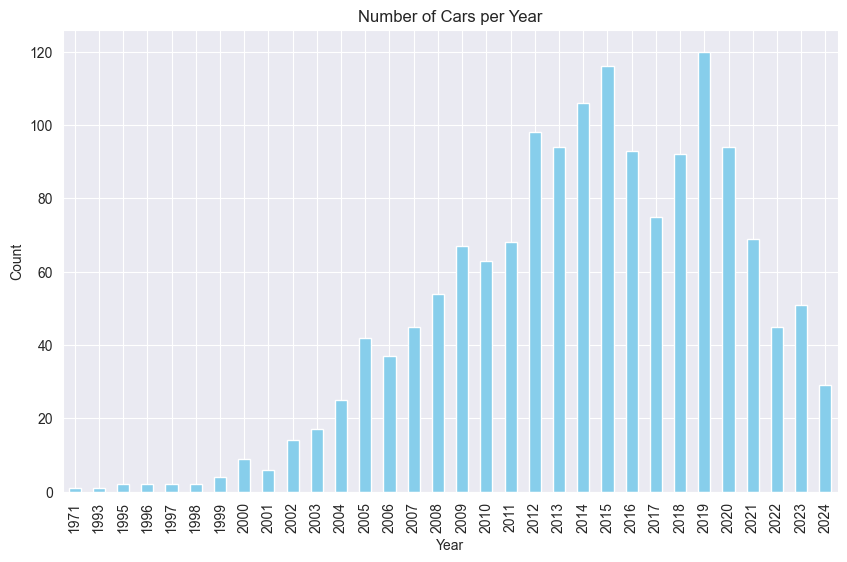

In [81]:
# Barchart using pandas
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Cars per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

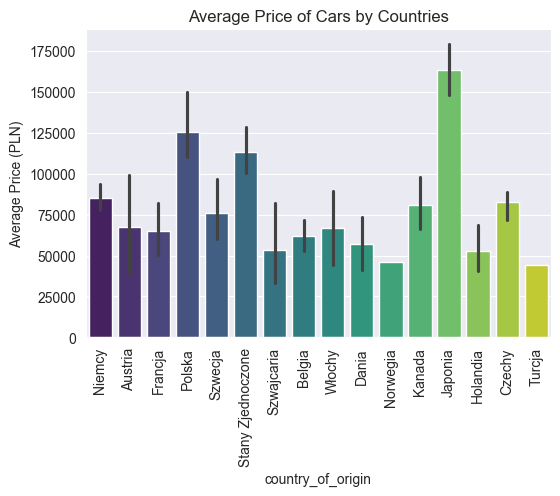

In [82]:
# Barplot using seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x='country_of_origin', y='price_pln', data=df, palette='viridis')
plt.title('Average Price of Cars by Countries')
plt.xlabel('country_of_origin')
plt.xticks(rotation=90)
plt.ylabel('Average Price (PLN)')
plt.show()

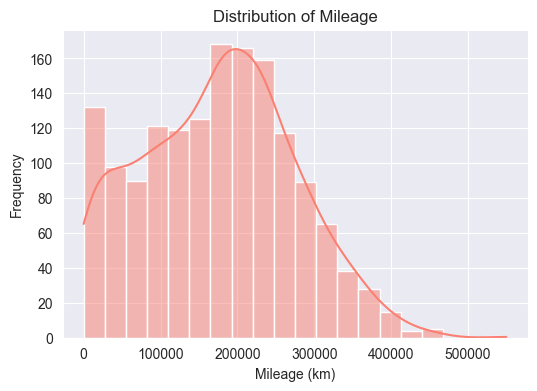

In [83]:
# Histplot using seaborn
plt.figure(figsize=(6,4))
sns.histplot(df['mileage_km'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Frequency')
plt.show()

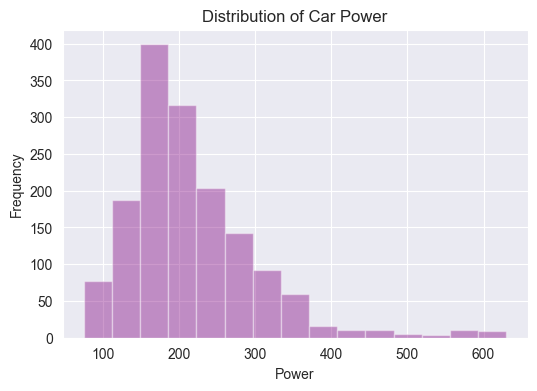

In [84]:
# Distplot using seaborn
plt.figure(figsize=(6,4))
sns.distplot(df['power'], kde=False, bins=15, color='purple')
plt.title('Distribution of Car Power')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.show()

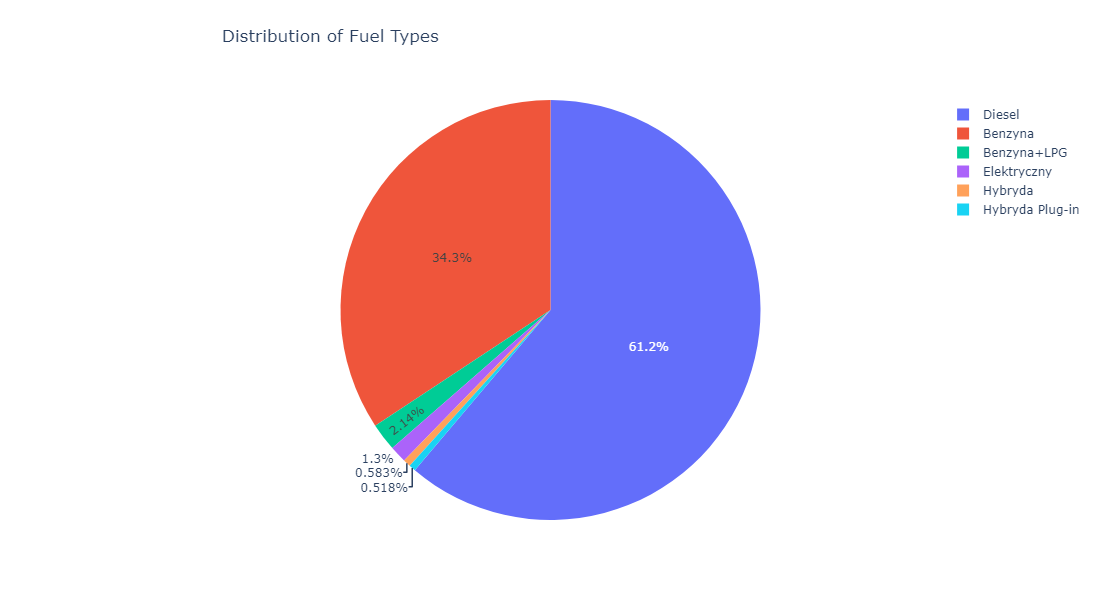

In [88]:
# Piechart using plotly
import plotly.express as px

# Piechart using plotly with custom size and title position
fig = px.pie(df, names='fuel_type', title='Distribution of Fuel Types')

# Adjusting the pie chart size
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)

# Adjusting the title position
fig.update_layout(
    title=dict(
        x=0.3,
        y=0.95,
        xanchor='center',
        yanchor='top'
    )
)

fig.show()